/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:38:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


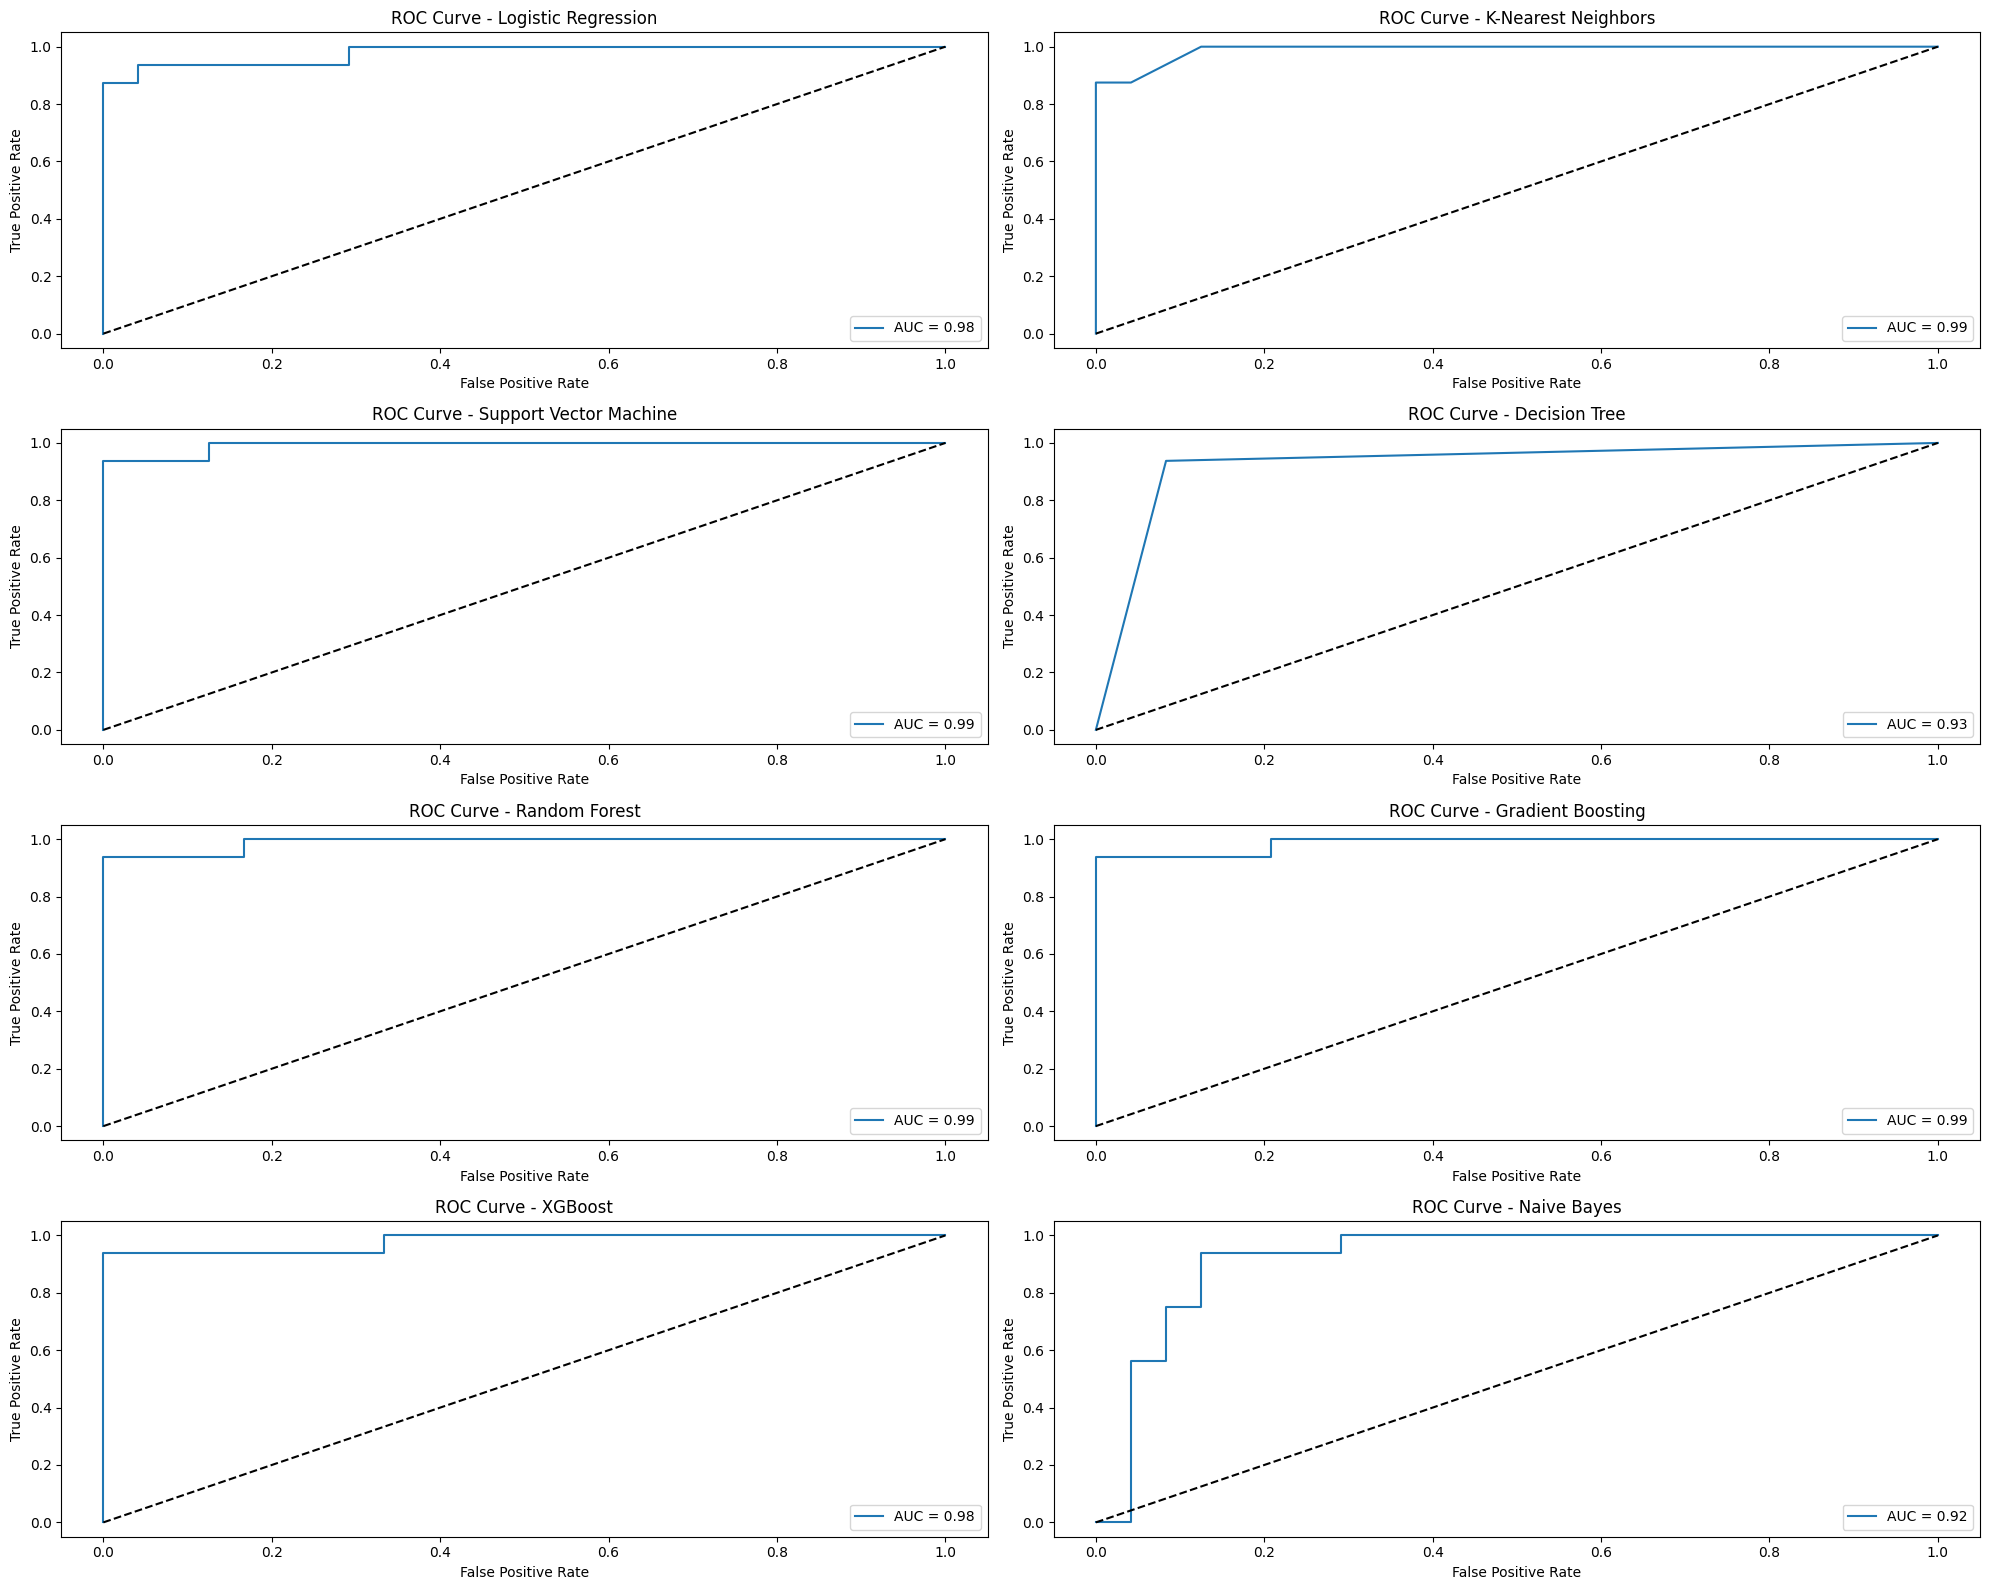

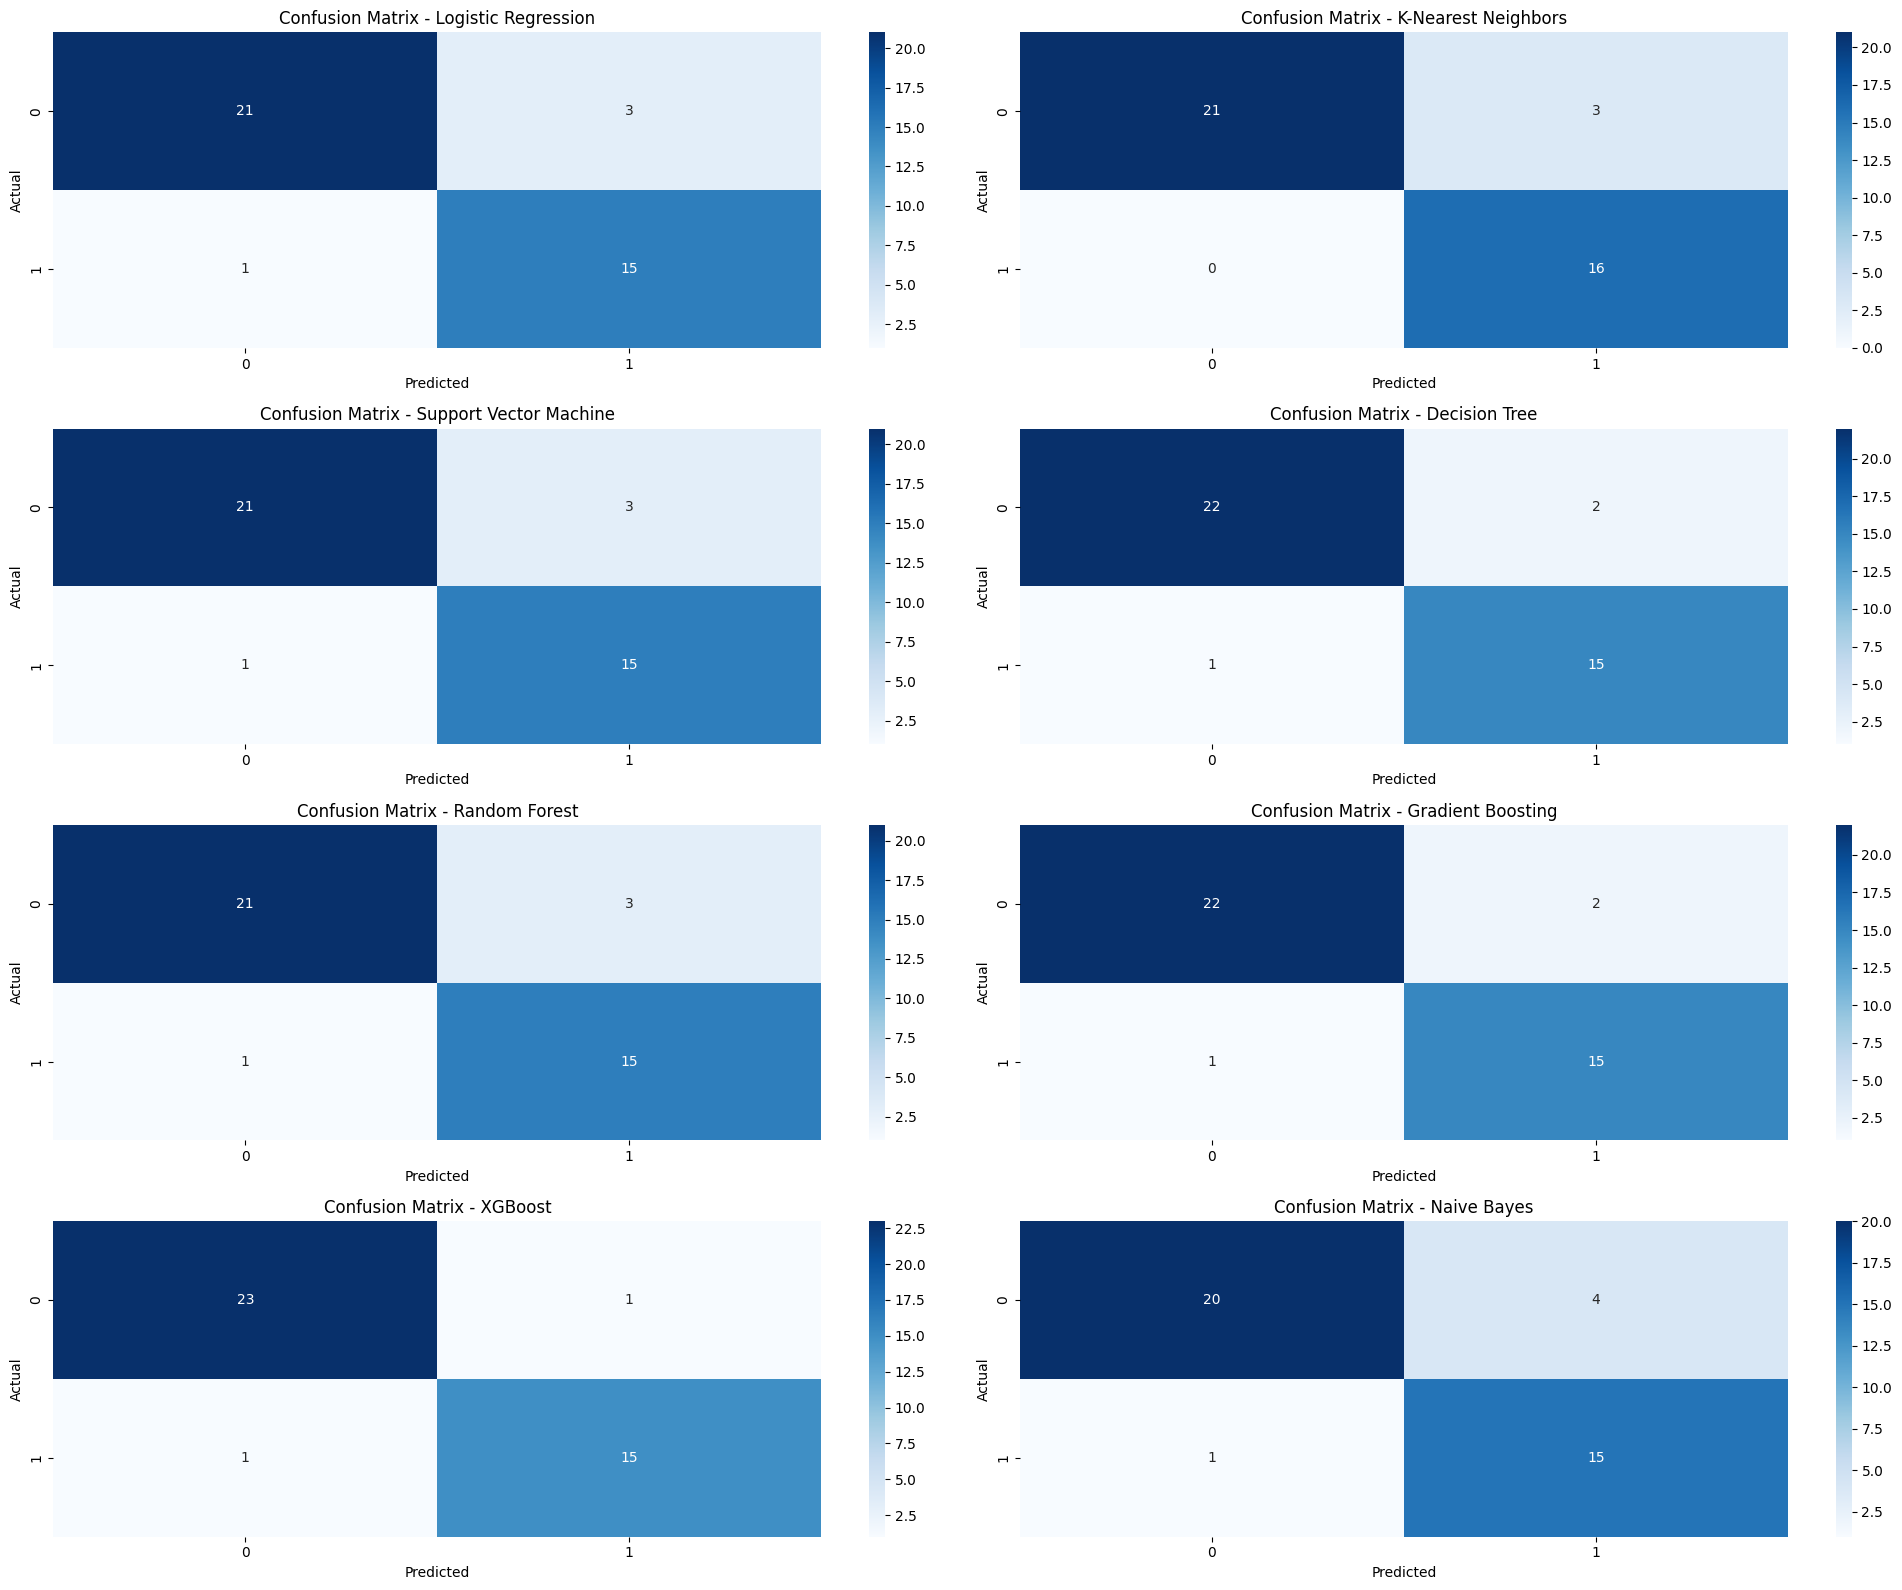

Logistic Regression:
 Accuracy: 0.90, Precision: 0.83, Recall: 0.94, F1 Score: 0.88, ROC AUC: 0.98

K-Nearest Neighbors:
 Accuracy: 0.93, Precision: 0.84, Recall: 1.00, F1 Score: 0.91, ROC AUC: 0.99

Support Vector Machine:
 Accuracy: 0.90, Precision: 0.83, Recall: 0.94, F1 Score: 0.88, ROC AUC: 0.99

Decision Tree:
 Accuracy: 0.93, Precision: 0.88, Recall: 0.94, F1 Score: 0.91, ROC AUC: 0.93

Random Forest:
 Accuracy: 0.90, Precision: 0.83, Recall: 0.94, F1 Score: 0.88, ROC AUC: 0.99

Gradient Boosting:
 Accuracy: 0.93, Precision: 0.88, Recall: 0.94, F1 Score: 0.91, ROC AUC: 0.99

XGBoost:
 Accuracy: 0.95, Precision: 0.94, Recall: 0.94, F1 Score: 0.94, ROC AUC: 0.98

Naive Bayes:
 Accuracy: 0.88, Precision: 0.79, Recall: 0.94, F1 Score: 0.86, ROC AUC: 0.92



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("/content/Advertising.csv")

# Binarize the target
df['HighSales'] = (df['Sales'] >= df['Sales'].median()).astype(int)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['HighSales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Naive Bayes": GaussianNB()
}

# Evaluation and visualization
results = {}
plt.figure(figsize=(20, 16))
for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results[name] = (acc, prec, rec, f1, auc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.subplot(4, 2, i + 1)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Confusion Matrices
plt.figure(figsize=(20, 16))
for i, (name, clf) in enumerate(classifiers.items()):
    y_pred = clf.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(4, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Print metrics
for name, (acc, prec, rec, f1, auc) in results.items():
    print(f"{name}:\n Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1 Score: {f1:.2f}, ROC AUC: {auc:.2f}\n")
